In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 100)

In [140]:
## local 환경에서 실행
# articles = pd.read_parquet("/fastcampus-data/articles/articels_only_contents.parquet")
orders_json = pd.read_json("/fastcampus-data/orders/orders.json")
products_json = pd.read_json("/fastcampus-data/products/products.json")
user_json = pd.read_json("/fastcampus-data/users/users.json", lines=True)

In [141]:
# articles_df= pd.DataFrame(articles).iloc[:,1:]
orders_df = pd.DataFrame(orders_json).iloc[:,1:]
products_df = pd.DataFrame(products_json).iloc[:,1:]
user_df = pd.DataFrame(user_json).iloc[:,1:]

In [180]:
# drop columns 전처리
def drop_columns(delete_columns:list,df:pd.DataFrame) -> pd.DataFrame:
    # 회의 때 얘기한 컬럼 전처리
    # None or 필요 없는 컬럼
    df = df.drop(columns=delete_columns)
    return df

def dict_to_column(columns:list,df:pd.DataFrame) -> pd.DataFrame:
    for col in columns:
        key_set = dict_to_set(col,df)
        df = set_to_column(col,key_set,df)
    return df

def dict_to_set(column:str,df:pd.DataFrame) -> set:
    key_set = set()
    for i in tqdm(df[column]):
        
        # column 내용이 dict일 경우
        if isinstance(i, dict):
            key_set |= set(i.keys())
        
        # column 내용이 None type 일 경우
        elif i == None:
            continue
        
        # column 내용이 [dict]로 감싸져있는 경우
        elif isinstance(i, list)&len(i)>0:
            if isinstance(i[0], str):
                continue
            key_set |= set(i[0].keys())
        


    return key_set

def set_to_column(column:str,key_set:set,df:pd.DataFrame) -> pd.DataFrame:
    for key in key_set:
        
        #중복인 경우 컬럼_중복컬럼으로 추가
        if key in df.columns:
            df[column+'_'+key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                      )
        #중복이 아닌 경우
        else:
            df[key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None
                                       else ( None \
                                       if len(x)==0 else ( x[0].get(key, None) \
                                       if isinstance(x[0],dict)  else \
                                           None)) \
                                      )

    df = df.drop(columns=[column])
    return df

# 컬럼안 key 값이 한 개일 경우 딕셔너리만 풉니다!
def key_to_element(element_columns:list,df:pd.DataFrame)->pd.DataFrame:
    for col in columns:
        key_set = dict_to_set(col, df)
        assert len(key_set)==1, f'{col}: key가 2개 이상이므로 dict_to_column 함수 이용하세요'
        for key in key_set:
            df[col] = df[col].apply(lambda x: x.get(key,None) if isinstance(x,dict) else None)
    return df

# orders table

## orders defs

In [4]:
# product와 연결되는 item product_id를 찾는 함수
def find_product(index):
    '''
    Find out the product_id in orders table with index number
    
    Args:
    index(int): input the index
    
    Returns:
    product_id
    '''
    try:
        product_id = str(eval(orders_csv["items"][index])[0]['product_id'])
        return product_id
    except:
        print("no item")

In [5]:
# column에 product_id 포함하는지 검색, customer_id 특정 가능
def find_product_id(df,column,product_id,customer_id=None):
    '''
    Find if the dataframe contains the product_id and returns the dataframe which contains input product_id and customer_id
    
    Args:
    df(Dataframe): orders table
    column(column): 'item' column
    product_id(string): product_id which you want figure out
    customer_id(string): customer_id which you want figure out, defalt=None
    
    Returns:
    df(Dataframe): table
    '''
    if customer_id == None:
        df_temp = df[df[column].str.contains(product_id ,na=False)]
    else:
        df_temp = df[( df[column].str.contains(product_id ,na=False) ) & ( df['customer_id'].str.contains(customer_id ,na=False) )]
    return df_temp
# find_product_id(orders_df,'items','5f51fecca0b91001bf48f211','60c6f4b80ccc56001bc8075f')

In [6]:
def strtodict(string):
    return eval(string)

In [7]:
# 전처리 할때 딕셔너리 형태의 str null 값 찾기
def findnull(df,column):
    df = df[df[column].map(len) > 0]
    return df

## explore orders

|Column|제거 이유|
|---|---|
|date_placed|null 값 6만개, 30 %|
|date_updated|null 8 %|
|date_closed|null 90 %|
|number|굳이 필요할까|
|shipping_status|모두 null 인듯|
|discounts|80% null|
|tax_rate|100% null|
|shipping_tax|96% null|
|shipping_discount|100% null|
|shipping_price|96% null|
|item_tax_included| bool, 모두 True|
|hold| bool, 99.6% False|
|referrer_url| 삭제 x admin 여부 확인 가능한 column|
|landing_url| 삭제 O note 없음|
|channel| 삭제 O admin 담당자 데이터 갯수 20개|
|comments| 삭제 O 주문자의 배송요구|
|coupon| 삭제 O 데이터 없음 |
|tracking_number| 삭제 O 데이터 1개 존재|
|tag| 삭제 O 데이터 없음|





In [8]:
orders_df

,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,items,discounts,...,channel,note,comments,coupon,tracking_number,customer_id,status_id,payment_method_id,shipping_method_id,tags
0,{'$date': '2019-08-24T05:44:27.710Z'},None,None,None,None,None,1036,,[],[],...,,,,,,{'$oid': '5d60cea34e77525ec5ca1413'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[]
1,{'$date': '2019-08-24T06:36:33.098Z'},{'$date': '2019-08-24T06:38:22Z'},{'$date': '2019-09-22T12:14:33.718Z'},None,None,None,1072,,[{'product_image': [{'id': {'$oid': '5d60b74e4...,[],...,,환완료,,,,{'$oid': '5d60ceba4e77525ec5ca1419'},{'$oid': '5d53f7cb4e77525ec5ca116d'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},None,[]
2,{'$date': '2019-08-24T06:01:52.756Z'},{'$date': '2019-09-04T08:18:26Z'},{'$date': '2019-09-06T09:13:52.571Z'},None,{'$date': '2019-09-06T09:13:26.749Z'},None,1056,,[{'product_image': [{'id': {'$oid': '5d60b74e4...,[],...,,,,,,{'$oid': '5d60d0a94e77525ec5ca1446'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[]
3,{'$date': '2019-08-24T07:08:44.815Z'},{'$date': '2019-10-21T02:09:35Z'},{'$date': '2019-10-21T05:14:24.764Z'},None,{'$date': '2019-10-21T02:18:23.528Z'},None,1081,,[{'product_image': [{'id': {'$oid': '5da6ab300...,[],...,,,,,,{'$oid': '5d60e2694e77525ec5ca14b5'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[]
4,{'$date': '2019-08-24T08:42:30.087Z'},None,None,None,None,None,1096,,[],[],...,,,,,,{'$oid': '5d60f3a74e77525ec5ca14da'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206684,{'$date': '2022-09-13T08:44:08.432Z'},{'$date': '2022-09-13T08:46:18Z'},{'$date': '2022-09-13T08:46:18.369Z'},None,{'$date': '2022-09-13T08:46:18.342Z'},None,277051,,[{'product_image': [{'id': {'$oid': '6258da64c...,"[{'name': '63203973e06940004babe12a', 'amount'...",...,,,,,,{'$oid': '5d70ccd419efa30eb2914271'},{'$oid': '5d48ead24e77525ec5ca1079'},{'$oid': '5d58dfb04e77525ec5ca11dd'},None,[]
206685,{'$date': '2022-09-13T08:49:33.893Z'},None,{'$date': '2022-09-13T08:49:39.382Z'},None,None,None,277052,,[{'product_image': [{'id': {'$oid': '62b12b400...,[],...,,,,,,{'$oid': '5d959ad20dabe405b156d820'},{'$oid': '614198cde87f260b75adfea7'},None,None,[]
206686,{'$date': '2022-09-13T08:52:27.573Z'},{'$date': '2022-09-13T08:53:42Z'},{'$date': '2022-09-13T08:53:42.289Z'},None,{'$date': '2022-09-13T08:53:42.268Z'},None,277053,,[{'product_image': [{'id': {'$oid': '620c7765d...,"[{'name': '63183d552b28000012c0b8e4', 'amount'...",...,,,,,,{'$oid': '5d918f180dabe405b156d5e5'},{'$oid': '5d48ead24e77525ec5ca1079'},{'$oid': '5d58dfb04e77525ec5ca11dd'},None,[]
206687,{'$date': '2022-09-13T08:55:05.734Z'},{'$date': '2022-09-13T08:59:21Z'},{'$date': '2022-09-13T08:59:46.122Z'},None,{'$date': '2022-09-13T08:59:21.151Z'},None,277054,,[{'product_image': [{'id': {'$oid': '630dc6166...,[],...,,,문 앞에 놓아주세요.,,,{'$oid': '628ecb419d9388002406f007'},{'$oid': '5d48eb534e77525ec5ca107c'},{'$oid': '5d58dfb04e77525ec5ca11dd'},None,[]


In [154]:
orders_json['items'][1][0]

{'product_image': [{'id': {'$oid': '5d60b74e4e77525ec5ca137c'},
   'alt': '',
   'position': 99,
   'filename': '제일경옥고3.png',
   'url': 'https://warehouse.medistream.co.kr/images/products/5d5cd0f74e77525ec5ca12ab/제일경옥고3.png'}],
 'id': {'$oid': '5d60daf14e77525ec5ca1498'},
 'product_id': {'$oid': '5d5cd0f74e77525ec5ca12ab'},
 'variant_id': None,
 'quantity': 3,
 'discount_total': 0,
 'name': '제일 경옥고',
 'price': 59400,
 'price_total': 178200,
 'sku': '',
 'tax_class': '',
 'tax_total': 0,
 'variant_name': '',
 'weight': 0}

In [181]:
df_2 = dict_to_column(['items'],orders_json)

100%|██████████| 206689/206689 [00:00<00:00, 330670.49it/s]


In [161]:
df_2

,_id,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,discounts,tax_rate,shipping_tax,shipping_discount,shipping_price,item_tax_included,shipping_tax_included,closed,cancelled,delivered,paid,hold,draft,referrer_url,landing_url,channel,note,comments,coupon,tracking_number,customer_id,status_id,payment_method_id,shipping_method_id,tags,category_id,sku,id,product_image,tax_total,custom_note,tax_class,origin_items,category_ids,quantity,weight,itemIds,price,variant_id,discount_total,custom_price,price_detail,name,variant_name,price_total,product_id,items_category_id,items_sku,items_id,items_product_image,items_tax_total,items_custom_note,items_tax_class,items_origin_items,items_category_ids,items_quantity,items_weight,items_itemIds,items_price,items_variant_id,items_discount_total,items_custom_price,items_price_detail,items_name,items_variant_name,items_price_total,items_product_id
0,{'$oid': '5d60cebb4e77525ec5ca141c'},{'$date': '2019-08-24T05:44:27.710Z'},None,None,None,None,None,1036,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '5d60cea34e77525ec5ca1413'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,None,None,None,None,NaN,None
1,{'$oid': '5d60daf14e77525ec5ca1497'},{'$date': '2019-08-24T06:36:33.098Z'},{'$date': '2019-08-24T06:38:22Z'},{'$date': '2019-09-22T12:14:33.718Z'},None,None,None,1072,,[],0,0,0,0,True,True,False,True,False,False,False,False,,,,환완료,,,,{'$oid': '5d60ceba4e77525ec5ca1419'},{'$oid': '5d53f7cb4e77525ec5ca116d'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5d60daf14e77525ec5ca1498'},"[{'id': {'$oid': '5d60b74e4e77525ec5ca137c'}, ...",0.0,None,,None,None,3.0,0.0,None,59400.0,None,0.0,None,None,제일 경옥고,,178200.0,{'$oid': '5d5cd0f74e77525ec5ca12ab'}
2,{'$oid': '5d60d2d04e77525ec5ca145b'},{'$date': '2019-08-24T06:01:52.756Z'},{'$date': '2019-09-04T08:18:26Z'},{'$date': '2019-09-06T09:13:52.571Z'},None,{'$date': '2019-09-06T09:13:26.749Z'},None,1056,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d60d0a94e77525ec5ca1446'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5d60d2d04e77525ec5ca145c'},"[{'id': {'$oid': '5d60b74e4e77525ec5ca137c'}, ...",0.0,None,과세,None,None,1.0,0.0,None,59400.0,None,0.0,None,None,제일 경옥고,,59400.0,{'$oid': '5d5cd0f74e77525ec5ca12ab'}
3,{'$oid': '5d60e27c4e77525ec5ca14b6'},{'$date': '2019-08-24T07:08:44.815Z'},{'$date': '2019-10-21T02:09:35Z'},{'$date': '2019-10-21T05:14:24.764Z'},None,{'$date': '2019-10-21T02:18:23.528Z'},None,1081,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d60e2694e77525ec5ca14b5'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5dad13270dabe405b156eee5'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,면세,None,None,1.0,0.0,None,37000.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37000.0,{'$oid': '5da696740dabe405b156eb5c'}
4,{'$oid': '5d60f8764e77525ec5ca14e5'},{'$date': '2019-08-24T08:42:30.087Z'},None,None,None,None,None,1096,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '5d60f3a74e77525ec5ca14da'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,Non

In [171]:
df_2[df_2['items_name'] == '한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책']

,_id,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,discounts,tax_rate,shipping_tax,shipping_discount,shipping_price,item_tax_included,shipping_tax_included,closed,cancelled,delivered,paid,hold,draft,referrer_url,landing_url,channel,note,comments,coupon,tracking_number,customer_id,status_id,payment_method_id,shipping_method_id,tags,category_id,sku,id,product_image,tax_total,custom_note,tax_class,origin_items,category_ids,quantity,weight,itemIds,price,variant_id,discount_total,custom_price,price_detail,name,variant_name,price_total,product_id,items_category_id,items_sku,items_id,items_product_image,items_tax_total,items_custom_note,items_tax_class,items_origin_items,items_category_ids,items_quantity,items_weight,items_itemIds,items_price,items_variant_id,items_discount_total,items_custom_price,items_price_detail,items_name,items_variant_name,items_price_total,items_product_id
3,{'$oid': '5d60e27c4e77525ec5ca14b6'},{'$date': '2019-08-24T07:08:44.815Z'},{'$date': '2019-10-21T02:09:35Z'},{'$date': '2019-10-21T05:14:24.764Z'},None,{'$date': '2019-10-21T02:18:23.528Z'},None,1081,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d60e2694e77525ec5ca14b5'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5dad13270dabe405b156eee5'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,면세,None,None,1.0,0.0,None,37000.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37000.0,{'$oid': '5da696740dabe405b156eb5c'}
129,{'$oid': '5d65dbc64e77525ec5ca1707'},{'$date': '2019-08-28T01:41:26.171Z'},{'$date': '2019-10-24T10:27:12Z'},{'$date': '2019-10-25T05:00:37.364Z'},None,{'$date': '2019-10-25T00:55:44.448Z'},None,1273,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,배송 전 연락바랍니다.,,,{'$oid': '5d65db024e77525ec5ca1706'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5dad0dfd0dabe405b156eeaa'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,면세,None,None,1.0,0.0,None,37900.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37900.0,{'$oid': '5da696740dabe405b156eb5c'}
543,{'$oid': '5d6f753519efa30eb29140c3'},{'$date': '2019-09-04T08:26:29.008Z'},None,None,None,None,None,1637,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '5d6a539019efa30eb2913df7'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,BO-GB-ITPK-KMDPM-OTH,{'$oid': '5e591767bfe4260944782abc'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,,None,None,1.0,0.0,None,37900.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37900.0,{'$oid': '5da696740dabe405b156eb5c'}
1543,{'$oid': '5da7af040dabe405b156ebda'},{'$date': '2019-10-17T00:00:04.308Z'},{'$date': '2019-10-17T00:19:15Z'},{'$date': '2019-10-21T05:14:23.263Z'},None,{'$date': '2019-10-17T01:30:06.579Z'},None,3909,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d9a89690dabe405b156df8e'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5da7af040dabe405b156ebdb'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,면세,None,None,1.0,0.0,None,37000.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37000.0,{'$oid': '5da696740dabe405b156eb5c'}
1544,{'$oid': '5da7fb8b0dabe405b156ebf5'},{'$date': '2019-10-17T05:26:35.773Z'},{'$date': '2019-10-17T05:28:50Z'},{'$date': '2019-10-21

### row별 dtype 확인

In [85]:

import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

In [109]:
df_2['category_ids'][6378]

[]

In [93]:
string_index = []
for i,row in df_2.iterrows():
    if row['category_ids'] == True:
        string_index.append(i)


In [94]:
string_index

[]

In [115]:
df_3 = dict_to_column(['category_ids'],df_2)

100%|██████████| 206689/206689 [00:00<00:00, 959250.07it/s] 


IndexError: list index out of range

## Order most popular

In [9]:
def findcontext(df):
    '''
    Figure out the context column table's dictionary which is 'page' value
    
    Args:
    df(Dataframe): log dataset
    
    Returns:
    li(list): values of 'page'
    '''
    li = []
    for i, row in df.iterrows():
        for j in row['context'].keys():
            if j == 'page':
                li.append(row['context'][j])
    return li

In [169]:
df_2

,_id,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,discounts,tax_rate,shipping_tax,shipping_discount,shipping_price,item_tax_included,shipping_tax_included,closed,cancelled,delivered,paid,hold,draft,referrer_url,landing_url,channel,note,comments,coupon,tracking_number,customer_id,status_id,payment_method_id,shipping_method_id,tags,category_id,sku,id,product_image,tax_total,custom_note,tax_class,origin_items,category_ids,quantity,weight,itemIds,price,variant_id,discount_total,custom_price,price_detail,name,variant_name,price_total,product_id,items_category_id,items_sku,items_id,items_product_image,items_tax_total,items_custom_note,items_tax_class,items_origin_items,items_category_ids,items_quantity,items_weight,items_itemIds,items_price,items_variant_id,items_discount_total,items_custom_price,items_price_detail,items_name,items_variant_name,items_price_total,items_product_id
0,{'$oid': '5d60cebb4e77525ec5ca141c'},{'$date': '2019-08-24T05:44:27.710Z'},None,None,None,None,None,1036,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '5d60cea34e77525ec5ca1413'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,None,None,None,None,NaN,None
1,{'$oid': '5d60daf14e77525ec5ca1497'},{'$date': '2019-08-24T06:36:33.098Z'},{'$date': '2019-08-24T06:38:22Z'},{'$date': '2019-09-22T12:14:33.718Z'},None,None,None,1072,,[],0,0,0,0,True,True,False,True,False,False,False,False,,,,환완료,,,,{'$oid': '5d60ceba4e77525ec5ca1419'},{'$oid': '5d53f7cb4e77525ec5ca116d'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5d60daf14e77525ec5ca1498'},"[{'id': {'$oid': '5d60b74e4e77525ec5ca137c'}, ...",0.0,None,,None,None,3.0,0.0,None,59400.0,None,0.0,None,None,제일 경옥고,,178200.0,{'$oid': '5d5cd0f74e77525ec5ca12ab'}
2,{'$oid': '5d60d2d04e77525ec5ca145b'},{'$date': '2019-08-24T06:01:52.756Z'},{'$date': '2019-09-04T08:18:26Z'},{'$date': '2019-09-06T09:13:52.571Z'},None,{'$date': '2019-09-06T09:13:26.749Z'},None,1056,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d60d0a94e77525ec5ca1446'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5d60d2d04e77525ec5ca145c'},"[{'id': {'$oid': '5d60b74e4e77525ec5ca137c'}, ...",0.0,None,과세,None,None,1.0,0.0,None,59400.0,None,0.0,None,None,제일 경옥고,,59400.0,{'$oid': '5d5cd0f74e77525ec5ca12ab'}
3,{'$oid': '5d60e27c4e77525ec5ca14b6'},{'$date': '2019-08-24T07:08:44.815Z'},{'$date': '2019-10-21T02:09:35Z'},{'$date': '2019-10-21T05:14:24.764Z'},None,{'$date': '2019-10-21T02:18:23.528Z'},None,1081,,[],0,0,0,0,True,True,False,False,False,True,False,False,,,,,,,,{'$oid': '5d60e2694e77525ec5ca14b5'},{'$oid': '5d48eb4a4e77525ec5ca107a'},{'$oid': '5d23e5dc4b25b80d9fb1f3e4'},{'$oid': '5cf8bbba0098b2225c5dfab1'},[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,,{'$oid': '5dad13270dabe405b156eee5'},"[{'id': {'$oid': '5da6ab300dabe405b156eb62'}, ...",0.0,None,면세,None,None,1.0,0.0,None,37000.0,None,0.0,None,None,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",,37000.0,{'$oid': '5da696740dabe405b156eb5c'}
4,{'$oid': '5d60f8764e77525ec5ca14e5'},{'$date': '2019-08-24T08:42:30.087Z'},None,None,None,None,None,1096,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '5d60f3a74e77525ec5ca14da'},{'$oid': '5d1d485b4b25b80d9fb1f372'},None,None,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,Non

In [14]:
# 가장 매출액이 높은 상품 20개
df_2['price'].groupby(by=df_2['name']).sum().sort_values()[-20:]

name
OMNIFIT 마인드케어                                   1.472000e+08
대요메디 3차원 맥영상 검사기 DMP-LIFEPLUS                   1.530000e+08
제트바이오텍 코로나 신속항원진단키트 전문가용 (25T)                  1.739800e+08
MESH T-1000 SMART 보급형 해상도 160X120               1.845000e+08
허먼밀러 Aeron Chair, Full, Graphite                1.954370e+08
HRV : MediCore SA-3000P                         2.005300e+08
[멤버스] 경영세션 EXCLUSIVE 02기 (전후반기 통합)              2.046000e+08
[멤버스] 경영세션 13기                                  2.046000e+08
한메드 Kinetrac DAVINCI (Kinetrac-9900)            2.310000e+08
방성혜 부인과 전문의서 처방 강의                              2.543205e+08
MESH T-1000 SMART 체열진단기                         2.760000e+08
동방 일회용 부항컵 1,000개                               2.933507e+08
아이웰니스 IWS-7000                                  3.619000e+08
방성혜 피부과 전문의서 처방 강의                              4.105231e+08
한메드 Davinci + 3D Newton 동시구매                    4.200000e+08
OMNIFIT 마인드케어 메디칼(ubpulse, 맥파분석기,ubpulse H3)    5.518000e+08
스파인엠티 코어           

In [17]:
df_2 = dict_to_column(['product_id'],df_2)

100%|██████████| 206689/206689 [00:00<00:00, 835113.70it/s]


In [61]:
# 가장 자주 팔린 제품
most_popular_often = df_2['$oid'].value_counts()[:20]
most_popular_often_index = most_popular_often.index
most_popular_often

5ff2d56f5ae455001b219ae2    3212
6226b268f967570023fa9ea3    2442
60d018b7d26af90681b18980    2274
60236e092c593a001ace9ffa    1696
6153c87c4cf9a5002287c4a6    1537
5d5cd0f74e77525ec5ca12ab    1441
5ef438c4e510ee503167d520    1302
5f28874bf05d685c4f22f508    1250
6107a90ad26af90681b1df70    1106
602f6ee32c593a001aceaed0    1060
62205bc5f967570023fa7de7     998
5f2889a8a0b91001bf48b5e7     971
630ca26f68554000236d9833     967
610b6f9ad26af90681b1e699     925
62c69af1b99f01002300ab86     880
62821cd49d9388002406450e     835
62821d249d93880024064523     835
62821dca9d9388002406455a     834
62821e709d93880024064599     834
62821d459d9388002406452b     834
Name: $oid, dtype: int64

In [33]:
products_df = dict_to_column(['_id'],products_json)

100%|██████████| 5141/5141 [00:00<00:00, 619962.53it/s]


In [57]:
most_popular_often_product = products_df[products_df['$oid'].isin(most_popular_often_index)]

In [58]:
most_popular_often_product = most_popular_often_product[['name','$oid']]
most_popular_often_product

,name,$oid
74,제일 경옥고,5d5cd0f74e77525ec5ca12ab
313,수성 의약외품 덴탈마스크 50매 1박스,5ef438c4e510ee503167d520
582,방성혜 피부과 전문의서 처방 강의,5f2889a8a0b91001bf48b5e7
683,방성혜 부인과 전문의서 처방 강의,5f28874bf05d685c4f22f508
1668,"부항컵 동방 일회용 1,000개",5ff2d56f5ae455001b219ae2
1929,임상해부학,60236e092c593a001ace9ffa
1991,[멤버스] Medistream MEMBERS _구독가입형,602f6ee32c593a001aceaed0
2753,윤상훈·권병조의 알짜 근육학,60d018b7d26af90681b18980
3053,"윤상훈, 권병조의 알짜 근육학 강의",6107a90ad26af90681b1df70
3094,임상 한의사를 위한 기본 한약처방 강의 2판,610b6f9ad26af90681b1e699


In [62]:
most_popular_often = pd.DataFrame(most_popular_often).reset_index(drop=False)
most_popular_often.rename(columns={'index':'$oid','$oid':'counts'},inplace=True)

In [63]:
most_popular_often

,$oid,counts
0,5ff2d56f5ae455001b219ae2,3212
1,6226b268f967570023fa9ea3,2442
2,60d018b7d26af90681b18980,2274
3,60236e092c593a001ace9ffa,1696
4,6153c87c4cf9a5002287c4a6,1537
5,5d5cd0f74e77525ec5ca12ab,1441
6,5ef438c4e510ee503167d520,1302
7,5f28874bf05d685c4f22f508,1250
8,6107a90ad26af90681b1df70,1106
9,602f6ee32c593a001aceaed0,1060


In [65]:
most_popular_often_20 = most_popular_often_product.merge(most_popular_often,on='$oid',how='inner')

In [66]:
most_popular_often_20

,name,$oid,counts
0,제일 경옥고,5d5cd0f74e77525ec5ca12ab,1441
1,수성 의약외품 덴탈마스크 50매 1박스,5ef438c4e510ee503167d520,1302
2,방성혜 피부과 전문의서 처방 강의,5f2889a8a0b91001bf48b5e7,971
3,방성혜 부인과 전문의서 처방 강의,5f28874bf05d685c4f22f508,1250
4,"부항컵 동방 일회용 1,000개",5ff2d56f5ae455001b219ae2,3212
5,임상해부학,60236e092c593a001ace9ffa,1696
6,[멤버스] Medistream MEMBERS _구독가입형,602f6ee32c593a001aceaed0,1060
7,윤상훈·권병조의 알짜 근육학,60d018b7d26af90681b18980,2274
8,"윤상훈, 권병조의 알짜 근육학 강의",6107a90ad26af90681b1df70,1106
9,임상 한의사를 위한 기본 한약처방 강의 2판,610b6f9ad26af90681b1e699,925


In [167]:
products_category = pd.read_json("/fastcampus-data/products/productCategories.json/products")

In [168]:
products_category 5dad13270dabe405b156eee5

,_id,date_created,date_updated,images,dimensions,name,description,meta_description,meta_title,tags,attributes,enabled,discontinued,slug,sku,code,tax_class,related_product_ids,prices,cost_price,regular_price,sale_price,quantity_inc,quantity_min,weight,stock_quantity,position,date_stock_expected,date_sale_from,date_sale_to,stock_tracking,stock_preorder,stock_backorder,category_id,category_ids,options,variants,three_months
0,{'$oid': '5d13115e32026c0b35383897'},{'$date': '2019-06-26T06:31:58.090Z'},{'$date': '2022-09-06T01:45:12.198Z'},"[{'id': {'$oid': '5d1311f532026c0b35383898'}, ...","{'length': 0, 'width': 0, 'height': 0}",KCD 한방내과 진찰진단 가이드라인,"<h2 align=""left""><strong>Medistream</strong><s...",진료에 어려움 있을 때 먼저 찾는 책,KCD 한방내과 진찰진단 가이드라인,[가온해미디어],"[{'name': '배송비', 'value': '무료'}, {'name': '저자'...",True,False,bo-mb-gaon-hbngs-oth,BO-MB-GAON-HBNGS-OTH,,,[],[],0,150000,135000.0,1,1,0,9999,12.0,None,{'$date': '2019-06-25T15:00:00Z'},{'$date': '2021-12-30T15:00:00Z'},False,False,False,{'$oid': '5cf8bbba0098b2225c5dfaa3'},"[{'$oid': '5e5d8beabfe4260944782c14'}, {'$oid'...","[{'id': {'$oid': '5d398a464e77525ec5ca1031'}, ...","[{'id': {'$oid': '5d8324ce3f0e6805c47066f0'}, ...",35
1,{'$oid': '5d9edfe70dabe405b156e213'},{'$date': '2019-10-10T07:38:15.467Z'},{'$date': '2022-09-07T04:46:33.117Z'},"[{'id': {'$oid': '5d9ee3320dabe405b156e216'}, ...","{'length': 0, 'width': 0, 'height': 0}",우리 아이 감기,<h2><strong>우리 아이 감기&nbsp;</strong></h2>\n<p><...,약물남용과 과잉치료가 없는 새로운 감기 진료를 목표로,우리 아이 감기,[물고기숲],"[{'name': '배송비', 'value': '무료'}, {'name': '저자'...",True,False,bo-mb-mggs-uraik-oth,BO-MB-MGGS-URAIK-OTH,,,[],[],0,19800,18000.0,1,1,0,9999,2.0,None,{'$date': '2019-10-09T15:00:00Z'},{'$date': '2122-01-24T02:27:22.441Z'},False,False,False,{'$oid': '5cf8bbba0098b2225c5dfaa3'},"[{'$oid': '5e5d8beabfe4260944782c14'}, {'$oid'...","[{'id': {'$oid': '60e47961ae811e631eda7f34'}, ...","[{'id': {'$oid': '60e47961ae811e631eda7f35'}, ...",7
2,{'$oid': '5e3cb2904267e105dfff13b3'},{'$date': '2020-02-07T00:42:56.629Z'},{'$date': '2022-09-01T05:58:01.574Z'},"[{'id': {'$oid': '5e46532f4267e105dfff1ca2'}, ...","{'length': 0, 'width': 0, 'height': 0}",통증치료를 위한 신경초음파와 하이드로다이섹션 테크닉,"<h2><img class=""fr-fic fr-dib fr-draggable"" sr...",하이드로다이섹션: 포도당을 이용한 신경의 유착박리와 신경주변 환경개선,통증치료를 위한 신경초음파와 하이드로다이섹션 테크닉,[메디안북],"[{'name': '배송비', 'value': '무료'}, {'name': '저자'...",True,False,bo-mb-mdab-nervh-oth,BO-MB-MDAB-NERVH-OTH,,,[],[],0,190000,171000.0,1,1,0,9999,NaN,None,{'$date': '2020-02-06T15:00:00Z'},{'$date': '2022-02-27T15:00:00Z'},False,False,False,{'$oid': '5cf8bbba0098b2225c5dfaa3'},[{'$oid': '5f9a5f1b51203163343206bd'}],"[{'id': {'$oid': '60e47962ae811e631eda7fe2'}, ...","[{'id': {'$oid': '60e47962ae811e631eda7fe3'}, ...",2
3,{'$oid': '5e3d06b64267e105dfff13e0'},{'$date': '2020-02-07T06:41:58.622Z'},{'$date': '2022-09-07T05:07:39.459Z'},[],"{'length': 0, 'width': 0, 'height': 0}",의사들이 꼭 알고 있어야 하는 응급의학 실전지침서(1-2),,,의사들이 꼭 알고 있어야 하는 응급의학 실전지침서(1-2),[메디안북],"[{'name': '배송비', 'value': '무료'}, {'name': '저자'...",False,False,bo-mb-mdab-emerb-oth,BO-MB-MDAB-EMERB-OTH,,,[],[],0,130000,117000.0,1,1,0,9999,NaN,None,{'$date': '2020-02-07T06:42:30.819Z'},{'$date': '2022-03-30T15:00:00Z'},False,False,False,{'$oid': '5cf8bbba0098b2225c5dfaa3'},[{'$oid': '5f9a5f1b51203163343206bd'}],"[{'id': {'$oid': '60e47962ae811e631eda7ff1'}, ...","[{'id': {'$oid': '60e47962ae811e631eda7ff2'}, ...",0
4,{'$oid': '5e3d0da94267e105dfff13ed'},{'$date': '2020-02-07T07:11:37.566Z'},{'$date': '2022-09-06T03:07:47.842Z'},"[{'id': {'$oid': '5e49fd734267e105dfff1d3d'}, ...","{'length': 0, 'width': 0, 'height': 0}",복부 초음파 정석,"<h2 dir=""ltr""><img class=""fr-fic fr-dib fr-dra...",정확한 복부초음파를 위한 필독서,복부 초음파 정석,[메디안북],"[{'name': '배송료', 'value': '무료'}, {'name': '저자'...",True,False,bo-mb-mdab-bcupb-oth,BO-MB-MDAB-BCUPB-OTH,,,[],[],0,60000,54000.0,1,1,0,9999,NaN,None,{'$date': '2020-02-07T07:12:12.804Z'},{'$date': '2122-01-24T05:43:05.398Z'},False,False,False,{'$oid': '5cf8bbba0098b2225c5dfaa3'},[{'$oid': '5f9a5f1b5120316334320

## most popular 도서 구매한 사람

### 임상해부학 60236e092c593a001ace9ffa

In [121]:
book1 = df_2[df_2['$oid'] == '60236e092c593a001ace9ffa']

In [123]:
book1 = dict_to_column(['customer_id'],book1)

100%|██████████| 1696/1696 [00:00<00:00, 527475.87it/s]
<ipython-input-114-b30be0291f6b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column+'_'+key] = df[column].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None if x==None


In [125]:
book1.iloc[-40:,:]

,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,discounts,tax_rate,shipping_tax,shipping_discount,shipping_price,item_tax_included,shipping_tax_included,closed,cancelled,delivered,paid,hold,draft,referrer_url,landing_url,channel,note,comments,coupon,tracking_number,status_id,payment_method_id,shipping_method_id,tags,category_id,sku,id,product_image,tax_total,custom_note,tax_class,origin_items,category_ids,quantity,weight,itemIds,price,variant_id,discount_total,custom_price,price_detail,name,variant_name,price_total,$oid,customer_id_$oid
169956,{'$date': '2022-06-23T00:35:22.371Z'},None,{'$date': '2022-06-23T04:09:17.191Z'},None,None,None,240322,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,2022-06-23 13:09:17 주문서 보관처리 (고객ID: 5e87d6fabf...,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62b3b54a08e04900234e1596'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{},None,임상해부학 특강,옵션을 선택해주세요.: 임상해부학 특강 - 골학,88000.0,60236e092c593a001ace9ffa,619b0525bc63410023478c22
170639,{'$date': '2022-06-25T00:05:41.003Z'},None,None,None,None,None,241006,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62b6515508e04900234e21b1'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{},None,임상해부학 특강,옵션을 선택해주세요.: 임상해부학 특강 - 골학,88000.0,60236e092c593a001ace9ffa,60f026bdd26af90681b1c62e
170790,{'$date': '2022-06-26T14:35:29.052Z'},None,None,None,None,None,241157,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62b86eb108e04900234e2432'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{},None,임상해부학 특강,옵션을 선택해주세요.: 임상해부학 특강 - 골학,88000.0,60236e092c593a001ace9ffa,5fd9d477329d0c001aca634e
170873,{'$date': '2022-06-27T01:17:46.481Z'},None,None,None,None,None,241240,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62b9053a08e04900234e25b7'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{},None,임상해부학 특강,옵션을 선택해주세요.: 임상해부학 특강 - 골학,88000.0,60236e092c593a001ace9ffa,5f155a1e221c8b5f77c8f3cf
171042,{'$date': '2022-06-27T07:00:40.380Z'},None,None,None,None,None,241409,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62b9559808e04900234e28d7'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{},None,임상해부학 특강,옵션을 선택해주세요.: 임상해부학 특강 - 골학,88000.0,60236e092c593a001ace9ffa,61d04fd07560f900324cc503
171495,{'$date': '2022-06-28T02:54:13.877Z'},None,{'$date': '2022-06-28T02:54:53.314Z'},None,None,None,241862,,[],0,0,0,0,True,True,False,False,False,False,False,True,,,,2022-06-28 11:54:52 주문서 보관처리 (고객ID: 6018a5aa2c...,,,,{'$oid': '614198cde87f260b75adfea7'},None,None,[],5ea40b671a3ca36b967849ad,CT-LT-MEDI-CLANA-OTH,{'$oid': '62ba6d5508e04900234e2f28'},"[{'id': {'$oid': '602384652c593a001acea01d'}, ...",0.0,{},과세,None,"[{'$oid': '5f920ad0512031633431f561'}, {'$oid'...",1.0,0.0,None,88000.0,{'$oid': '60236f102c593a001acea003'},0.0,{}

In [40]:
orders_json.columns

Index(['_id', 'date_created', 'date_placed', 'date_updated', 'date_closed',
       'date_paid', 'date_cancelled', 'number', 'shipping_status', 'items',
       'discounts', 'tax_rate', 'shipping_tax', 'shipping_discount',
       'shipping_price', 'item_tax_included', 'shipping_tax_included',
       'closed', 'cancelled', 'delivered', 'paid', 'hold', 'draft',
       'referrer_url', 'landing_url', 'channel', 'note', 'comments', 'coupon',
       'tracking_number', 'customer_id', 'status_id', 'payment_method_id',
       'shipping_method_id', 'tags'],
      dtype='object')

In [39]:
orders_df.columns

Index(['date_created', 'date_placed', 'date_updated', 'date_closed',
       'date_paid', 'date_cancelled', 'number', 'shipping_status', 'items',
       'discounts', 'tax_rate', 'shipping_tax', 'shipping_discount',
       'shipping_price', 'item_tax_included', 'shipping_tax_included',
       'closed', 'cancelled', 'delivered', 'paid', 'hold', 'draft',
       'referrer_url', 'landing_url', 'channel', 'note', 'comments', 'coupon',
       'tracking_number', 'customer_id', 'status_id', 'payment_method_id',
       'shipping_method_id', 'tags', 'price_detail', 'category_id', 'itemIds',
       'quantity', 'product_image', 'id', 'product_id', 'category_ids',
       'variant_id', 'origin_items', 'sku', 'tax_class', 'price',
       'discount_total', 'price_total', 'custom_note', 'tax_total',
       'custom_price', 'weight', 'name', 'variant_name', 'items_price_detail',
       'items_category_id', 'items_itemIds', 'items_quantity',
       'items_product_image', 'items_id', 'items_product_id',
    

In [4]:
orders_df['items'][1]

[{'product_image': [{'id': {'$oid': '5d60b74e4e77525ec5ca137c'},
    'alt': '',
    'position': 99,
    'filename': '제일경옥고3.png',
    'url': 'https://warehouse.medistream.co.kr/images/products/5d5cd0f74e77525ec5ca12ab/제일경옥고3.png'}],
  'id': {'$oid': '5d60daf14e77525ec5ca1498'},
  'product_id': {'$oid': '5d5cd0f74e77525ec5ca12ab'},
  'variant_id': None,
  'quantity': 3,
  'discount_total': 0,
  'name': '제일 경옥고',
  'price': 59400,
  'price_total': 178200,
  'sku': '',
  'tax_class': '',
  'tax_total': 0,
  'variant_name': '',
  'weight': 0}]

In [27]:
orders_df['items'][1][0]

{'product_image': [{'id': {'$oid': '5d60b74e4e77525ec5ca137c'},
   'alt': '',
   'position': 99,
   'filename': '제일경옥고3.png',
   'url': 'https://warehouse.medistream.co.kr/images/products/5d5cd0f74e77525ec5ca12ab/제일경옥고3.png'}],
 'id': {'$oid': '5d60daf14e77525ec5ca1498'},
 'product_id': {'$oid': '5d5cd0f74e77525ec5ca12ab'},
 'variant_id': None,
 'quantity': 3,
 'discount_total': 0,
 'name': '제일 경옥고',
 'price': 59400,
 'price_total': 178200,
 'sku': '',
 'tax_class': '',
 'tax_total': 0,
 'variant_name': '',
 'weight': 0}

In [ ]:
product_image,id,product_id,variant_id,quantity,discount_total,name,price,price_total,sku,tax_class,tax_total,variant_name,weight = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
for i, row in orders_df.iterrows():
    if len(row['items'])>0:
        if row['items'][0]['product_image']:
            product_image.append(row['items'][0]['product_image'])
        if row['items'][0]['id']:
            id.append(row['items'][0]['id'])        
        if row['items'][0]['product_id']:
            product_id.append(row['items'][0]['product_id'])
        if row['items'][0]['variant_id']:
            variant_id.append(row['items'][0]['variant_id'])
        if row['items'][0]['quantity']:
            quantity.append(row['items'][0]['quantity'])
        if row['items'][0]['discount_total']:
            discount_total.append(row['items'][0]['discount_total'])
        if row['items'][0]['name']:
            name.append(row['items'][0]['name'])
        if row['items'][0]['price']:
            price.append(row['items'][0]['price'])
        if row['items'][0]['price_total']:
            price_total.append(row['items'][0]['price_total'])
        if row['items'][0]['sku']:
            sku.append(row['items'][0]['sku'])
        if row['items'][0]['tax_class']:
            tax_class.append(row['items'][0]['tax_class'])
        if row['items'][0]['tax_total']:
            tax_total.append(row['items'][0]['tax_total'])     
        if row['items'][0]['variant_name']:
            variant_name.append(row['items'][0]['variant_name'])  
        if row['items'][0]['weight']:
            weight.append(row['items'][0]['weight']) 

In [44]:
product_image,id,product_id,variant_id,quantity,discount_total,name,price,price_total,sku,tax_class,tax_total,variant_name,weight = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
for i, row in orders_df.iterrows():
    try:
        product_image.append(row['items'][0]['product_image'])
    except:
        product_image.append(None)
    try:
        id.append(row['items'][0]['id'])  
    except:
        id.append(None)
    try:
        product_id.append(row['items'][0]['product_id'])
    except:
        product_id.append(None)
    try:    
        variant_id.append(row['items'][0]['variant_id'])
    except:
        variant_id.append(None)
    try:
        quantity.append(row['items'][0]['quantity'])
    except:
        quantity.append(None)
    try:
        discount_total.append(row['items'][0]['discount_total'])
    except:
        discount_total.append(None)
    try:
        name.append(row['items'][0]['name'])
    except:
        name.append(None)
    try:
        price.append(row['items'][0]['price'])
    except:
        price.append(None)
    try:
        price_total.append(row['items'][0]['price_total'])
    except:
        price_total.append(None)
    try:
        sku.append(row['items'][0]['sku'])
    except:
        sku.append(None)
    try:
        tax_class.append(row['items'][0]['tax_class'])
    except:
        tax_class.append(None)
    try:
        tax_total.append(row['items'][0]['tax_total'])
    except:
        tax_total.append(None)
    try:
        variant_name.append(row['items'][0]['variant_name'])
    except:
        variant_name.append(None)
    try:
        weight.append(row['items'][0]['weight'])
    except:
        weight.append(None)

In [45]:
# product_image,id,product_id,variant_id,quantity,discount_total,name,price,price_total,sku,tax_class,tax_total,variant_name,weight
orders_df['product_image']= product_image
orders_df['id'] = id
orders_df['product_id'] = product_id
orders_df['variant_id'] = variant_id
orders_df['quantity'] = quantity
orders_df['discount_total'] = discount_total
orders_df['name'] = name
orders_df['price'] = price
orders_df['price_total'] = price_total
orders_df['sku'] = sku
orders_df['tax_class'] = tax_class
orders_df['tax_total'] = tax_total
orders_df['variant_name'] = variant_name
orders_df['weight'] = weight
orders_df

,date_created,date_placed,date_updated,date_closed,date_paid,date_cancelled,number,shipping_status,items,discounts,...,quantity,discount_total,name,price,price_total,sku,tax_class,tax_total,variant_name,weight
0,{'$date': '2019-08-24T05:44:27.710Z'},None,None,None,None,None,1036,,[],[],...,NaN,NaN,None,NaN,NaN,None,None,NaN,None,NaN
1,{'$date': '2019-08-24T06:36:33.098Z'},{'$date': '2019-08-24T06:38:22Z'},{'$date': '2019-09-22T12:14:33.718Z'},None,None,None,1072,,[{'product_image': [{'id': {'$oid': '5d60b74e4...,[],...,3.0,0.0,제일 경옥고,59400.0,178200.0,,,0.0,,0.0
2,{'$date': '2019-08-24T06:01:52.756Z'},{'$date': '2019-09-04T08:18:26Z'},{'$date': '2019-09-06T09:13:52.571Z'},None,{'$date': '2019-09-06T09:13:26.749Z'},None,1056,,[{'product_image': [{'id': {'$oid': '5d60b74e4...,[],...,1.0,0.0,제일 경옥고,59400.0,59400.0,,과세,0.0,,0.0
3,{'$date': '2019-08-24T07:08:44.815Z'},{'$date': '2019-10-21T02:09:35Z'},{'$date': '2019-10-21T05:14:24.764Z'},None,{'$date': '2019-10-21T02:18:23.528Z'},None,1081,,[{'product_image': [{'id': {'$oid': '5da6ab300...,[],...,1.0,0.0,"한의원 원장님도 기획자가 돼야한다 생각한다면, 읽어야 하는 책",37000.0,37000.0,,면세,0.0,,0.0
4,{'$date': '2019-08-24T08:42:30.087Z'},None,None,None,None,None,1096,,[],[],...,NaN,NaN,None,NaN,NaN,None,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206684,{'$date': '2022-09-13T08:44:08.432Z'},{'$date': '2022-09-13T08:46:18Z'},{'$date': '2022-09-13T08:46:18.369Z'},None,{'$date': '2022-09-13T08:46:18.342Z'},None,277051,,[{'product_image': [{'id': {'$oid': '6258da64c...,"[{'name': '63203973e06940004babe12a', 'amount'...",...,1.0,0.0,"다나침 한쌈용 1,000쌈 (10,000pcs)",135000.0,135000.0,ME-AM-DNMD-DAN1K-161,과세,0.0,옵션: 0.16x15mm,0.0
206685,{'$date': '2022-09-13T08:49:33.893Z'},None,{'$date': '2022-09-13T08:49:39.382Z'},None,None,None,277052,,[{'product_image': [{'id': {'$oid': '62b12b400...,[],...,1.0,0.0,"[메디스트림 스탠다드] 당삼 500g, 중국",13400.0,13400.0,MDHMSSIKEIFB0373,과세,0.0,"옵션: [메디스트림 스탠다드] 당삼 500g, 중국",0.0
206686,{'$date': '2022-09-13T08:52:27.573Z'},{'$date': '2022-09-13T08:53:42Z'},{'$date': '2022-09-13T08:53:42.289Z'},None,{'$date': '2022-09-13T08:53:42.268Z'},None,277053,,[{'product_image': [{'id': {'$oid': '620c7765d...,"[{'name': '63183d552b28000012c0b8e4', 'amount'...",...,1.0,0.0,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",47400.0,47400.0,MD-HM-A025-CK436-6H5,면세,0.0,"옵션: [씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",0.0
206687,{'$date': '2022-09-13T08:55:05.734Z'},{'$date': '2022-09-13T08:59:21Z'},{'$date': '2022-09-13T08:59:46.122Z'},None,{'$date': '2022-09-13T08:59:21.151Z'},None,277054,,[{'product_image': [{'id': {'$oid': '630dc6166...,[],...,1.0,0.0,맘 편하게 한약 처방하기,264000.0,264000.0,CT-LT-JOOS-MINDJ-OTH,과세,0.0,+옵션: (얼리버드 이벤트) 맘 편하게 한약 처방하기,0.0


In [32]:
len(product_image)

111210

In [129]:
items_li[0]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [{'id': {'$oid': '5d60b74e4e77525ec5ca137c'},
   'alt': '',
   'position': 99,
   'filename': '제일경옥고3.png',
   'url': 'https://warehouse.medistream.co.kr/images/products/5d5cd0f74e77525ec5ca12ab/제일경옥고3.png'}],
 {'$oid': '5d60daf14e77525ec5ca1498'},
 {'$oid': '5d5cd0f74e77525ec5ca12ab'},
 None,
 3,
 0,
 '제일 경옥고',
 59400,
 178200,
 '',
 '',
 0,
 '',
 0,
 [{'id': {'$oid': '5d60b74e4e77525ec5ca137c'},
   'alt': '',
   'position': 99,
   'filename': '제일경옥고3.png',
   'url': 'https://warehouse.medistream.co.kr/images/products/5d5cd0f74e77525ec5ca12ab/제일경옥고3.png'}],
 {'$oid': '5d60d2d04e77525ec5ca145c'},
 {'$oid': '5d5cd0f74e77525ec5ca12ab'},
 None,
 1,
 0,
 '제일 경옥고',
 59400,
 59400,
 '',
 '과세',
 0,
 '',
 0,
 [{'id': {'$oid': '5da6ab300dabe405b156eb62'},
   'alt': '',
   'position': 99,
   'filename': '기획자.png',
   'url': 'https://warehouse.medistream.co.kr/images/products/5da696740dabe405b156eb5

In [127]:
# orders_df['items'][1]
li = []

for i, row in orders_df.iterrows():
#     if len(row['items'])>0:
#         li.append(row['items'][0])
    if len(row['items'])>0:
        for i,j in enumerate(row['items'][0].keys()):
            items_li[i].append(row['items'][0][j])
#             items_li[1].append(row['items'][0][j])
#             items_li[2].append(row['items'][0][j])
#             items_li[3].append(row['items'][0][j])
#             items_li[4].append(row['items'][0][j])
#             items_li[5].append(row['items'][0][j])
#             items_li[6].append(row['items'][0][j])
#             items_li[7].append(row['items'][0][j])
#             items_li[8].append(row['items'][0][j])
#             items_li[9].append(row['items'][0][j])
#             items_li[10].append(row['items'][0][j])
#             items_li[11].append(row['items'][0][j])
#             items_li[12].append(row['items'][0][j])
#             items_li[13].append(row['items'][0][j])
    else:
            items_li[0].append(None)
            items_li[1].append(None)
            items_li[2].append(None)
            items_li[3].append(None)
            items_li[4].append(None)
            items_li[5].append(None)
            items_li[6].append(None)
            items_li[7].append(None)
            items_li[8].append(None)
            items_li[9].append(None)
            items_li[10].append(None)
            items_li[11].append(None)
            items_li[12].append(None)
            items_li[13].append(None)
items_li

IndexError: list index out of range

In [98]:
li[5]

3

# log table

In [10]:
path = '../data/1663027200000/'
import os
def logconcat(path, startswith):
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.startswith(startswith)]
    file_list_py
    df = pd.DataFrame()
    for i in file_list_py:
        data = pd.read_json(path+i,lines=True)
        df = pd.concat([df,data])
    return df.reset_index(drop = True)

In [12]:
# logconcat(path,'1')

In [13]:
def findcontext(df):
    '''
    Figure out the context column table's dictionary which is 'page' value
    
    Args:
    df(Dataframe): log dataset
    
    Returns:
    li(list): values of 'page'
    '''
    li = []
    for i, row in df.iterrows():
        for j in row['context'].keys():
            if j == 'page':
                li.append(row['context'][j])
    return li

In [14]:
def contexttocolumn(df):
    '''
    Add columns with context column's 'page' key-value
    
    Args:
    df(Dataframe): log table
    
    Returns:
    df(Dataframe): key-value added log table
    
    '''
    li = []
    for i, row in df.iterrows():
        for j in row['context'].keys():
            if j == 'page':
                li.append(row['context'][j])    
    df_dic = df.copy()
    df_dic['page'] = li
    path, referrer, search, title, url = [], [],[],[],[]
    for i, row in df_dic.iterrows():
        for j in row['page'].keys():
            if j == 'path':
                path.append(row['page'][j])
            if j == 'referrer':
                referrer.append(row['page'][j])
            if j == 'search':
                search.append(row['page'][j])
            if j == 'title':
                title.append(row['page'][j])
            if j == 'url':
                url.append(row['page'][j])
    df_dic['path'] = path
    df_dic['referrer'] = referrer
    df_dic['search'] = search
    df_dic['title'] = title
    df_dic['url'] = url  
    return df_dic

In [61]:
len(df_dic[df_dic['traits'].isna() == True]) / len(df_dic)

0.5500329404875192

In [62]:
len(df_dic[df_dic['userId'].isna() == True]) / len(df_dic)

0.004355464460874021

In [16]:
# traits에 customerId인 데이터 찾기
def find_data_customerId(df,column,customerId):
    '''
    Make the dataframe which contains input customerId
    
    Args:
    df(Dataframe): log dataframe 
    column(String): 'trait' column
    customerId(String): customerId you want to find
    
    Returns:
    df(Dataframe): Dataframe which contains input customerId
    '''
    li=[]
    for i, row in df.iterrows():
        try:
            if row[column]['customerId'] == customerId:
                li.append(i)
        except:
            continue
    return df.iloc[li,:]
# find_data_customerId(df_dic,'traits','5d705e9419efa30eb29141e8')

# user

In [176]:
user_df[user_df['customer_id'] == '5f7fdd7348060c52caf165c6']

,customer_id,age_group,한의사 여부,사업자 여부
19568,5f7fdd7348060c52caf165c6,30-39,1,0


In [177]:

user_df[user_df['customer_id'] == '5d62c2ce4e77525ec5ca15c5']

,customer_id,age_group,한의사 여부,사업자 여부
4477,5d62c2ce4e77525ec5ca15c5,20-29,1,0
5526,5d62c2ce4e77525ec5ca15c5,20-29,0,0


In [172]:
user_df['age_group'].value_counts()

20-29    5063
30-39    4843
40-49    2423
50-59    1025
60-       159
10-19       3
0-9         2
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

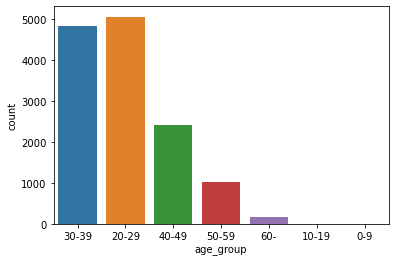

In [67]:
sns.countplot(x='age_group',data=user_df)

In [65]:
user_df

,customer_id,age_group,한의사 여부,사업자 여부
0,5d60cefc4e77525ec5ca1426,30-39,1,1
1,5d689c3019efa30eb2913d7c,30-39,1,1
2,5d6ca7cd19efa30eb2913e7e,20-29,1,1
3,5d6f43e919efa30eb2913f97,40-49,1,1
4,5d6f5fb319efa30eb2913fac,30-39,1,1
...,...,...,...,...
20507,619d7813bc63410023479677,None,1,0
20508,62211b67f967570023fa8096,None,0,0
20509,622976eef967570023fab8c9,None,1,0
20510,6271c0acff5b0f00261ecb86,None,0,0
